## BANK MARKETING Project: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing Dataset & showing first 5 rows
df_bank = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv")
df_bank.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


#### Dataset Attributes
Here is the description of all the variables:
•	Variable: Definition  
•	ID: Unique client ID  
•	age: Age of the client  
•	job: Type of job  
•	marital: Marital status of the client  
•	education: Education level  
•	default: Credit in default.  
•	housing: Housing loan   
•	loan: Personal loan   
•	contact: Type of communication   
•	month: Contact month  
•	day_of_week: Day of week of contact   
•	duration: Contact duration   
•	campaign: number of contacts performed during this campaign to the client  
•	pdays: number of days that passed by after the client was last contacted   
•	previous: number of contacts performed before this campaign   
•	poutcome: outcome of the previous marketing campaign   
#### Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)


### Exploratory Data Analysis(EDA)

In [3]:
#checking the dimension of the dataset
df_bank.shape

(31647, 18)

This dataset contains 31647 rows and 18 columns(where 17 features and one label).

In [4]:
#getting the information from the dataset
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [5]:
# Checking Data type of Columns
df_bank.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

There are two types of data(int and object) present in the dataset.

In [6]:
# checking for the missing values
df_bank.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

We can see there are no missing values present in the dataset.

In [7]:
#checking column names
df_bank.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [8]:
#Dropping unnecessary columns i.e "ID" as it is least relevant to our target variable.
df_bank.drop(['ID'],axis=1,inplace=True)
df_bank.shape

(31647, 17)

In [9]:
# Checking the Unique Values of Each Column
df_bank.apply(pd.Series.unique)

age           [56, 31, 27, 57, 33, 50, 45, 35, 36, 44, 39, 4...
job           [admin., unknown, services, management, techni...
marital                             [married, divorced, single]
education               [unknown, secondary, tertiary, primary]
default                                               [no, yes]
balance       [1933, 3, 891, 3287, 119, 0, 1044, 1811, 1951,...
housing                                               [no, yes]
loan                                                  [no, yes]
contact                          [telephone, cellular, unknown]
day           [19, 20, 18, 22, 4, 2, 3, 8, 15, 5, 28, 6, 14,...
month         [nov, jul, jun, feb, sep, jan, may, aug, apr, ...
duration      [44, 91, 240, 867, 380, 116, 353, 97, 692, 789...
campaign      [2, 1, 3, 4, 7, 5, 33, 12, 8, 9, 6, 24, 17, 11...
pdays         [-1, 84, 251, 9, 456, 120, 92, 347, 154, 291, ...
previous      [0, 3, 2, 4, 1, 5, 9, 6, 8, 11, 16, 10, 14, 7,...
poutcome                     [unknown, s

### Statistical analysis of the Numerical data

In [10]:
#summary of the dataset
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


From the above we can observe the following points.   
The counts of all the columns are same i.e,31647 which means there are no missing values present in it.   
we observe that there is a huge difference between the 75% and max of some columns,so there may be outliers present in it.

### Visualization

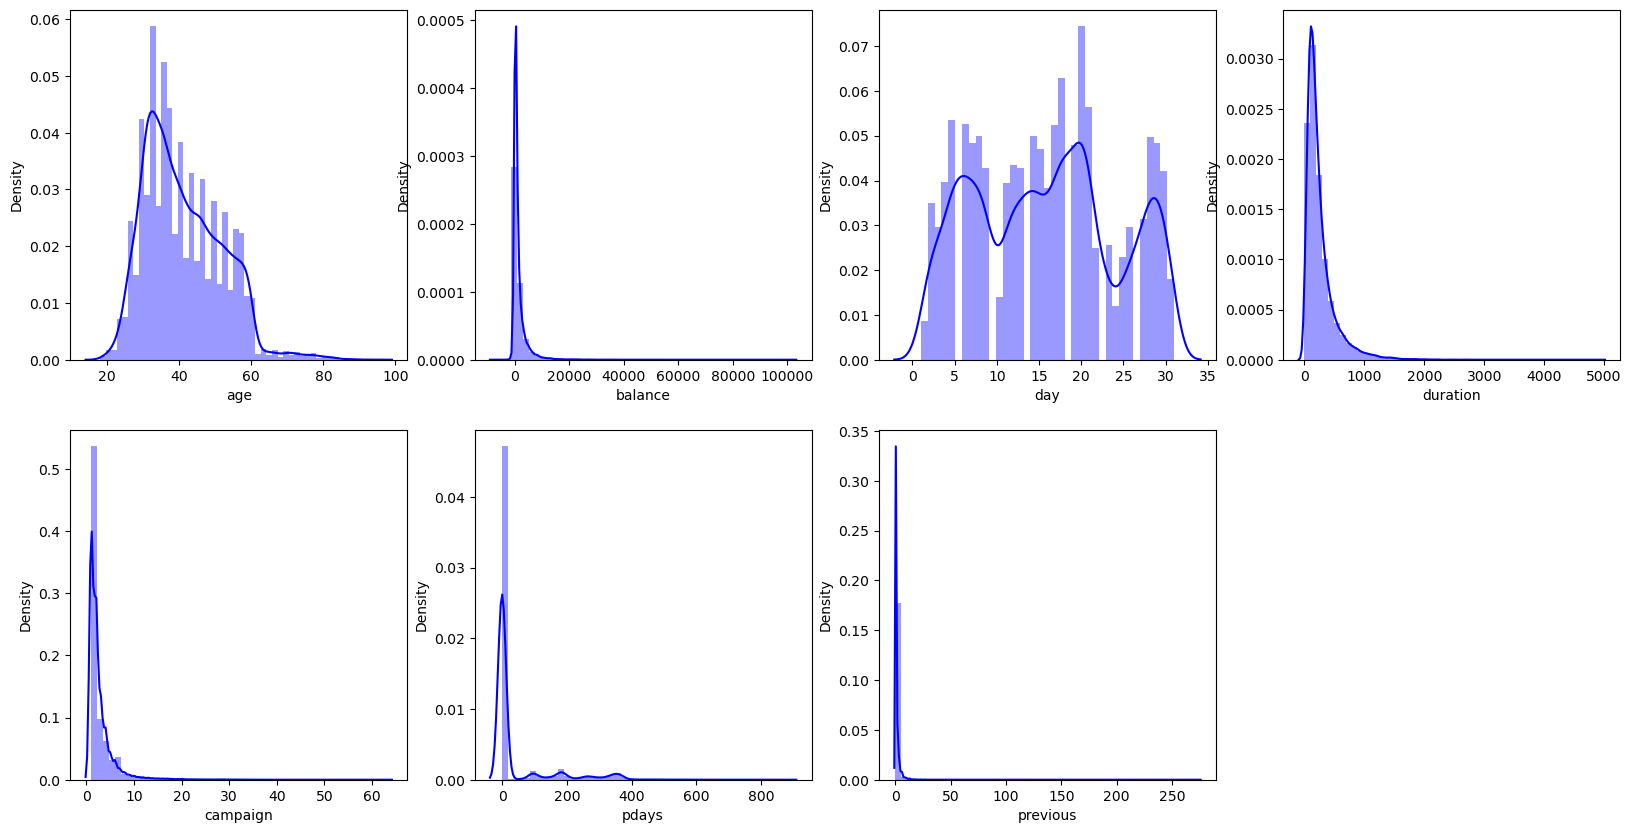

In [11]:
#Checking for numerical columns
num_col=['age','balance','day','duration','campaign','pdays','previous']

plt.figure(figsize=(20,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber <= 7:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df_bank[column],color='b')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()


From above plot we can observe in some column distribution is not normal seems presence of outliers.

#### Visualizing the outliers using boxplot

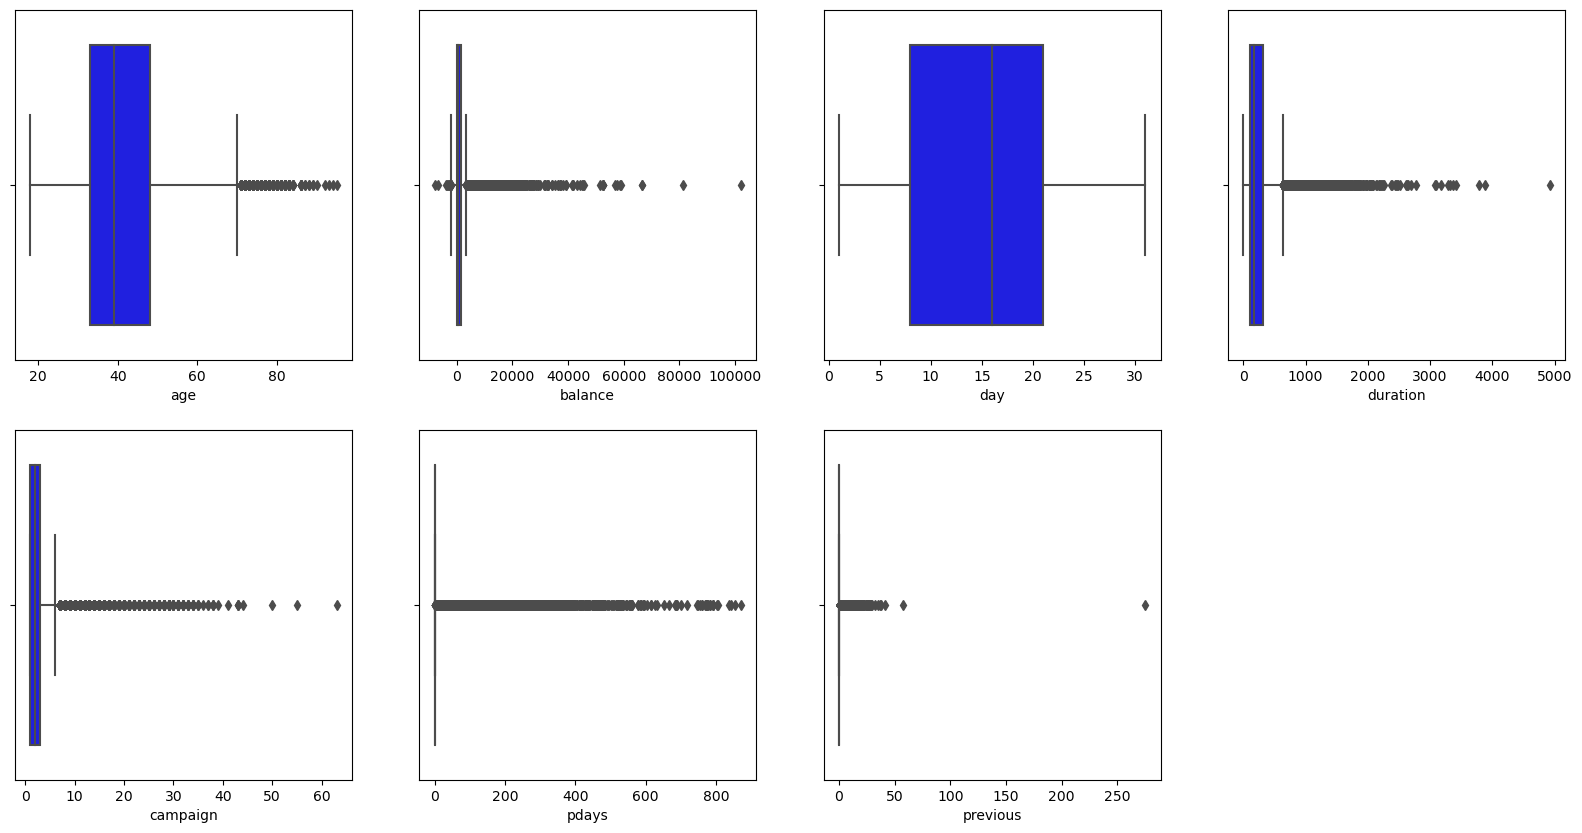

In [12]:
plt.figure(figsize=(20,10),facecolor='white')
graph=1
for column in num_col:
    if graph <= 7:
        ax=plt.subplot(2,4,graph)
        sns.boxplot(df_bank[column],color='b')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

As we can see from the above that there are too much skewness in the columns 'balane','pdays' and 'previous'. so we should remove them.

In [13]:
df_bank.drop(['previous','pdays','balance'],axis=1,inplace=True)
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,poutcome,subscribed
0,56,admin.,married,unknown,no,no,no,telephone,19,nov,44,2,unknown,no
1,31,unknown,married,secondary,no,no,no,cellular,20,jul,91,2,unknown,no
2,27,services,married,secondary,no,yes,no,cellular,18,jul,240,1,unknown,no
3,57,management,divorced,tertiary,no,no,no,cellular,22,jun,867,1,success,yes
4,31,technician,married,secondary,no,yes,no,cellular,4,feb,380,1,unknown,no


We can see the above 3 columns has been removed.

#### Removing outliers using z-score method

In [14]:
from scipy.stats import zscore
z=zscore(df_bank[['age','duration','campaign']])
abs_z=np.abs(z)
df_bank=df_bank[(abs_z<3).all(axis=1)]  #3-std deviation data


### Visualization of categorical Data

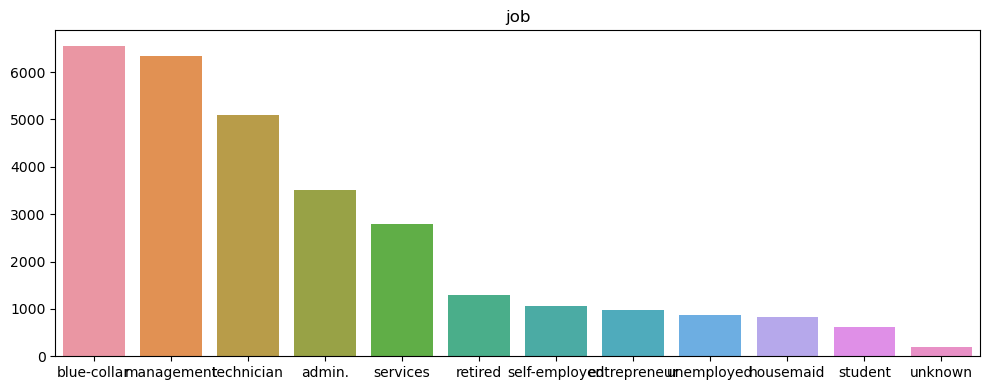

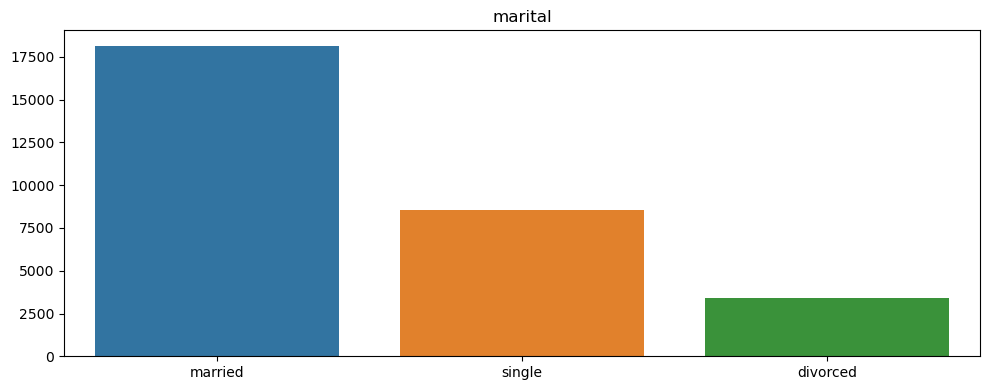

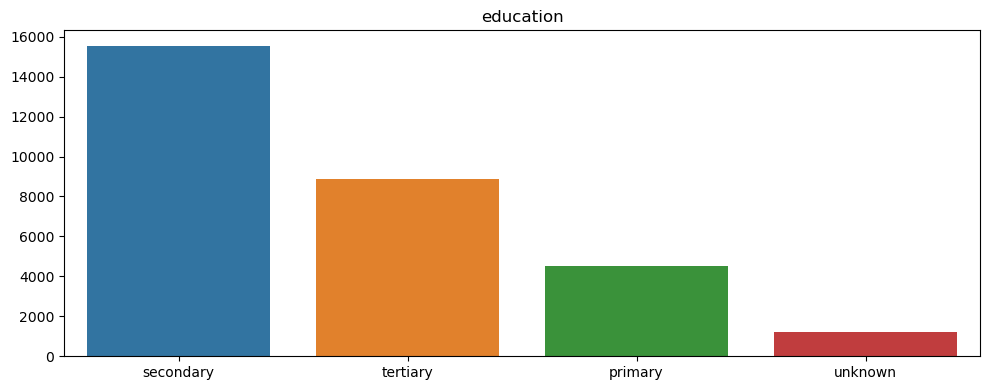

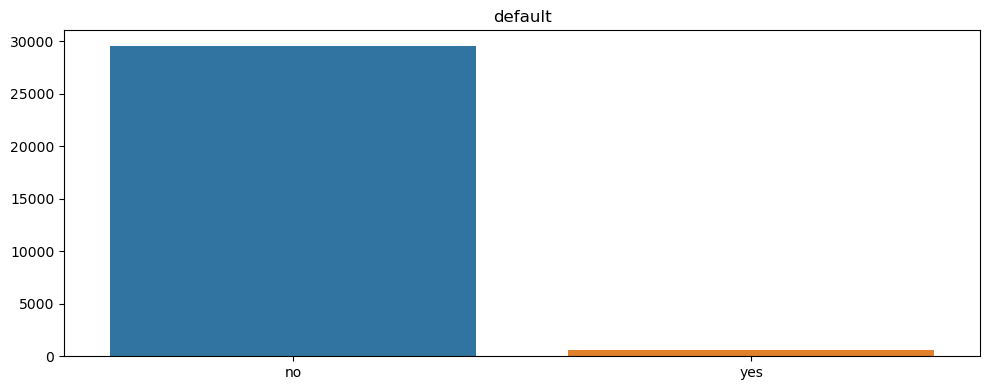

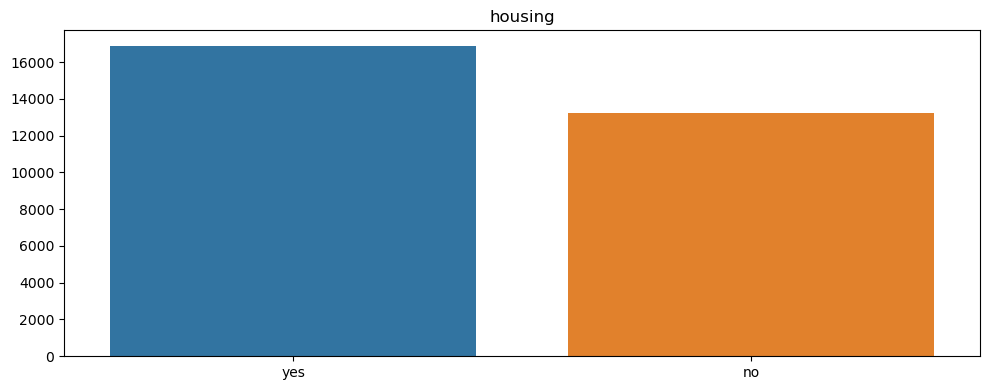

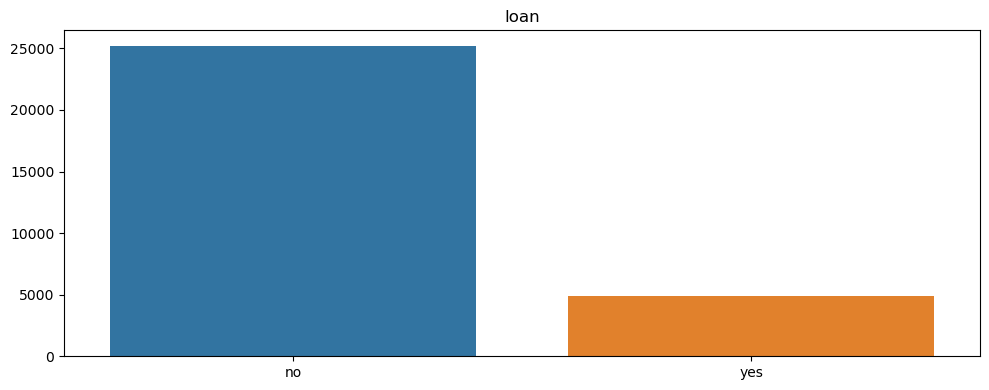

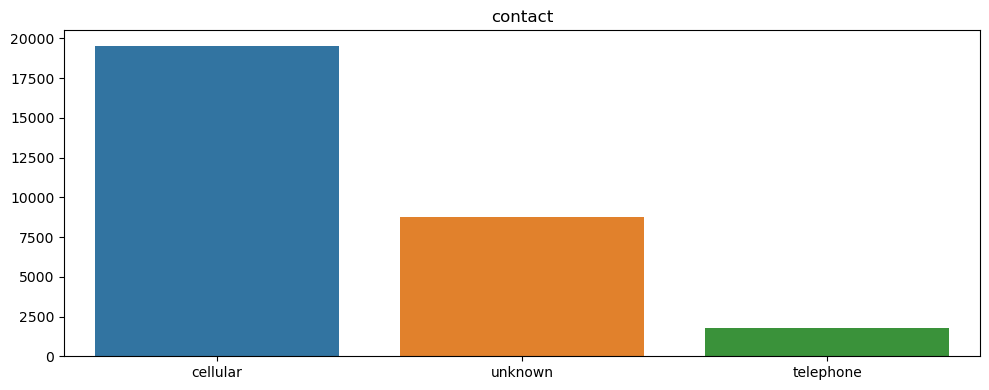

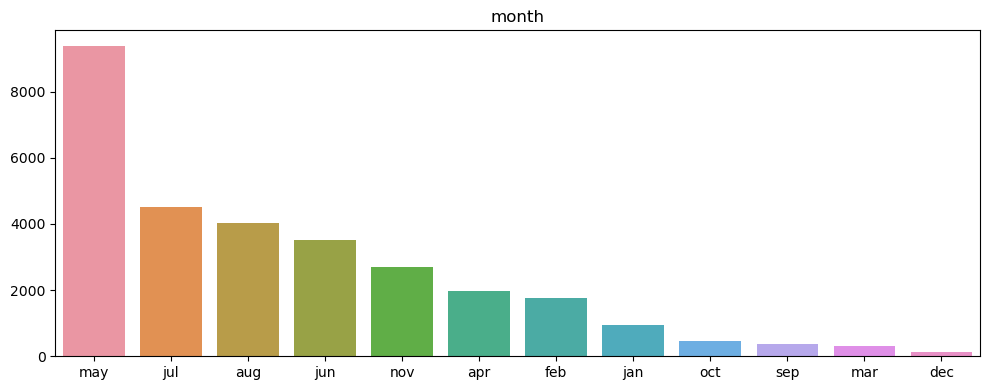

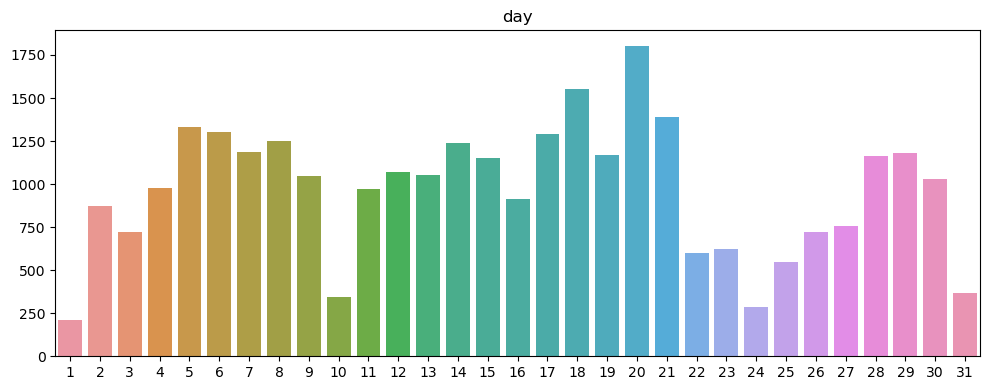

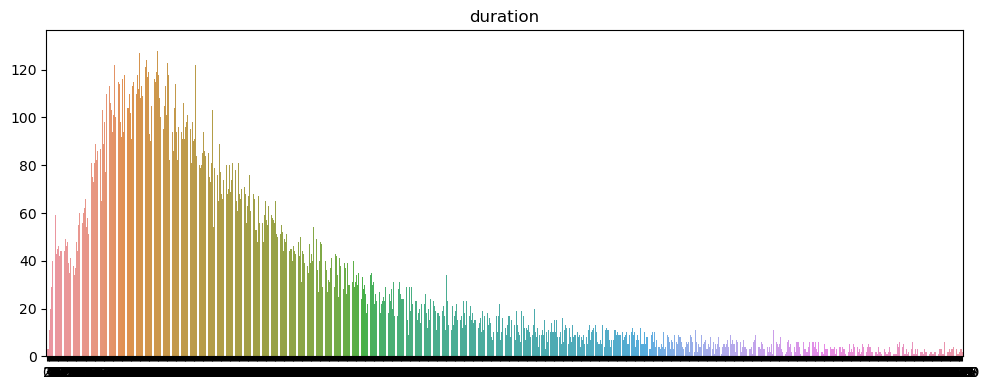

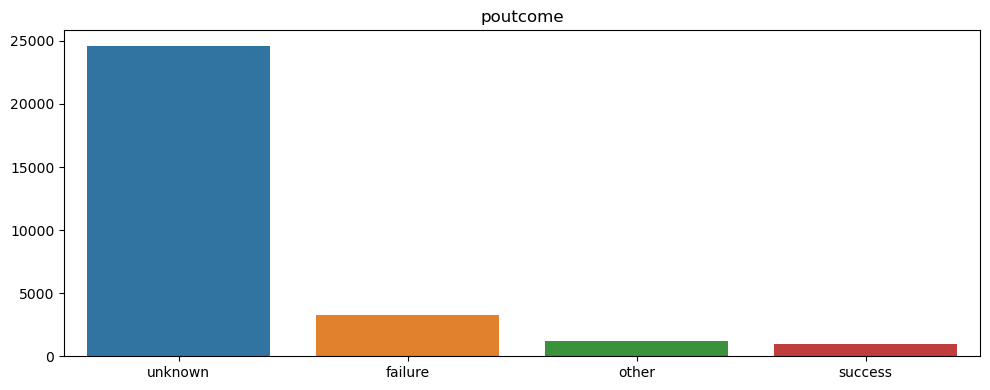

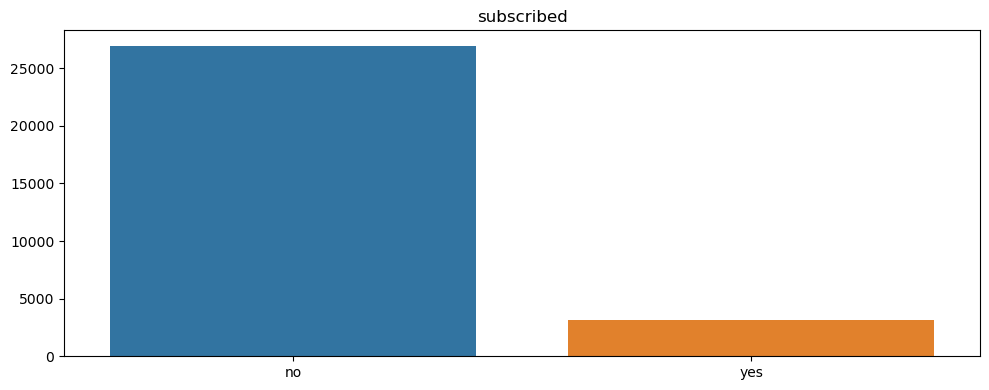

In [15]:
cat_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day', 'duration', 'poutcome','subscribed']
for col in cat_col:
    plt.figure(figsize=(10,4))
    sns.barplot(df_bank[col].value_counts().index, df_bank[col].value_counts().values)
    plt.title(col)
    plt.tight_layout()

### Encoding the categorical columns

In [16]:
le=LabelEncoder()
for i in df_bank.drop(['subscribed'],axis=1):
    df_bank[i]=le.fit_transform(df_bank[i])
df_bank

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,poutcome,subscribed
0,38,0,1,3,0,0,0,1,18,9,43,1,3,no
1,13,11,1,1,0,0,0,0,19,5,90,1,3,no
2,9,7,1,1,0,1,0,0,17,5,239,0,3,no
3,39,4,0,2,0,0,0,0,21,6,864,0,2,yes
4,13,9,1,1,0,1,0,0,3,3,379,0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31641,19,9,2,2,0,0,0,2,5,6,441,1,3,no
31642,11,4,2,2,0,1,0,0,11,8,115,1,3,no
31643,35,4,0,2,0,0,1,0,4,6,437,1,3,yes
31644,14,4,2,2,0,0,0,0,6,1,36,2,3,no


### Correlation matrix using HeatMap

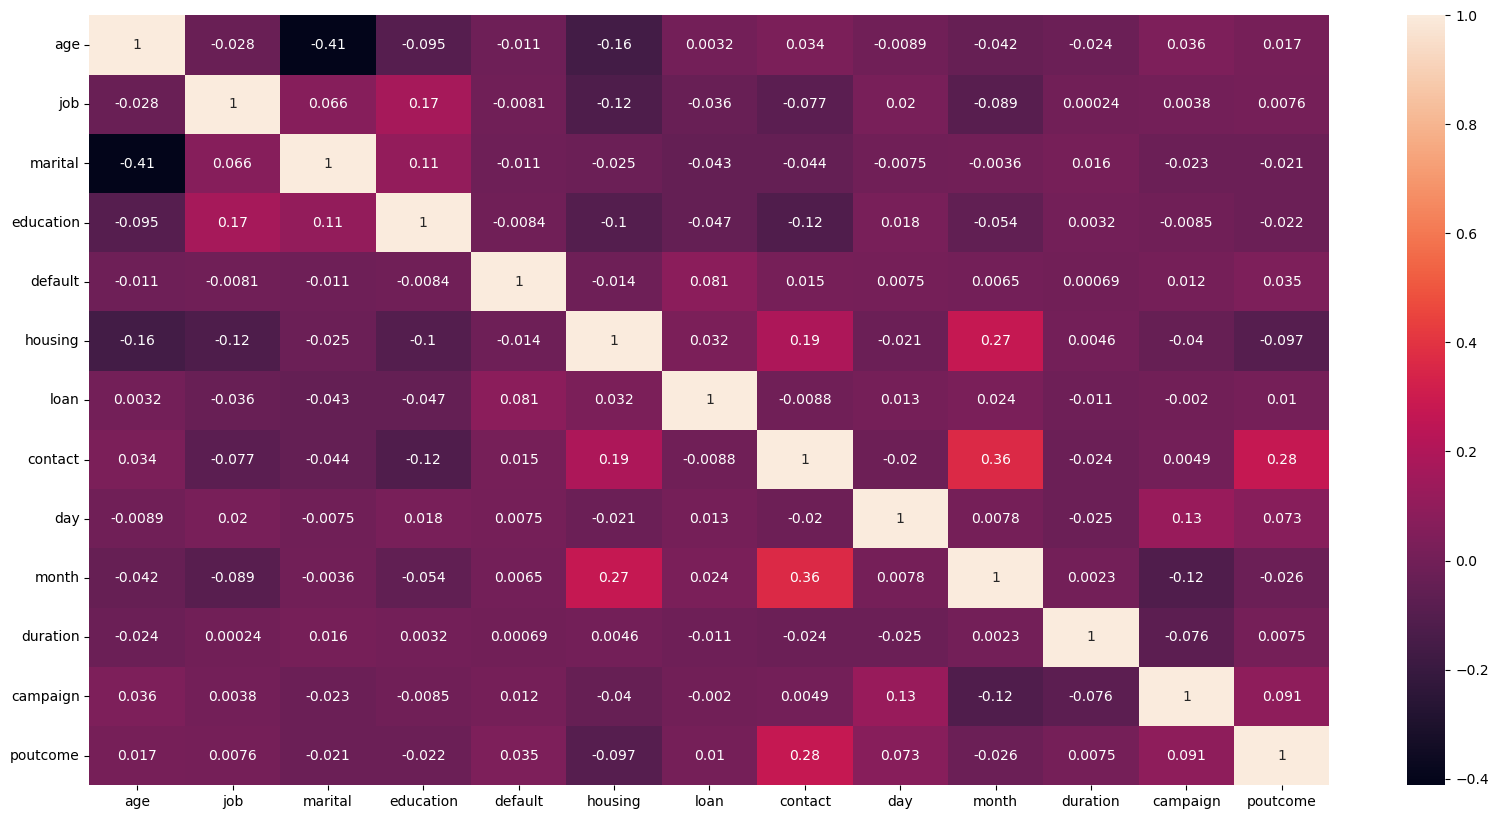

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(df_bank.corr(), annot = True)
plt.show()

#### Checking balance of our target variable/Label

no     26933
yes     3185
Name: subscribed, dtype: int64


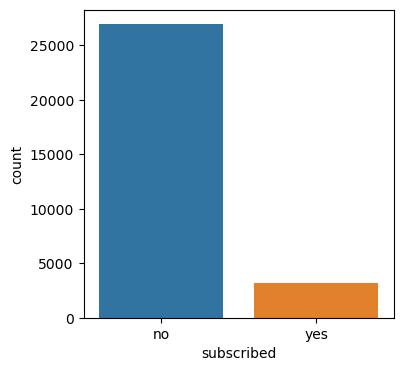

In [18]:
print(df_bank['subscribed'].value_counts())

plt.figure(figsize=(4,4))
sns.countplot(df_bank['subscribed'])
plt.show()

**From above we can see that the dataset is highly imbalance, we need to do the sampling for the better results**

In [19]:
# Dropping the Target column from the Training set.
x = df_bank.drop(['subscribed'],axis=1)
y = df_bank['subscribed']

### Oversampling data using SMOTE

In [20]:
# Oversampling the data.
from imblearn.over_sampling import SMOTE
os=SMOTE()
x1,y1 = os.fit_resample(x,y)

In [21]:
#Now checking value count of target column
y1.value_counts()

no     26933
yes    26933
Name: subscribed, dtype: int64

Now the data is balanced.

#### Splitting the dataset in Train and Test Set.

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.2, random_state=0)

Here using the 80% data for the training set and 20% data for the testing set.

In [23]:
#Standardize our data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Model Building(Classification)

### Desicision Tree Classifier

In [24]:
model1 = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=None)
model1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [25]:
pred = model1.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model1, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 92%
Classification Report :
               precision    recall  f1-score   support

          no       0.93      0.90      0.91      5409
         yes       0.90      0.93      0.92      5365

    accuracy                           0.92     10774
   macro avg       0.92      0.92      0.92     10774
weighted avg       0.92      0.92      0.92     10774

Cross Validation Score: 0.8812338393396363
Difference between Accuracy Score and Cross Validation Score is 0.03383948533086678


### Logistic Regression

In [26]:
model2 = LogisticRegression()
model2.fit(x_train, y_train) 

LogisticRegression()

In [27]:
pred = model2.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model2, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 85%
Classification Report :
               precision    recall  f1-score   support

          no       0.87      0.83      0.85      5409
         yes       0.84      0.88      0.86      5365

    accuracy                           0.85     10774
   macro avg       0.86      0.85      0.85     10774
weighted avg       0.86      0.85      0.85     10774

Cross Validation Score: 0.8957102521344144
Difference between Accuracy Score and Cross Validation Score is -0.04106016859997963


### Random Forest Classifier

In [28]:
model3 = RandomForestClassifier()
model3.fit(x_train, y_train)

RandomForestClassifier()

In [29]:
pred = model3.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model3, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 94%
Classification Report :
               precision    recall  f1-score   support

          no       0.96      0.92      0.94      5409
         yes       0.92      0.96      0.94      5365

    accuracy                           0.94     10774
   macro avg       0.94      0.94      0.94     10774
weighted avg       0.94      0.94      0.94     10774

Cross Validation Score: 0.9102529777949467
Difference between Accuracy Score and Cross Validation Score is 0.028024356528424388


Here Random Forest Classifier looks like our best model as the accuracy is 94% and the difference between Accuracy Score and Cross Validation Score is minimum here.

### Hyper Parameter Tuning

In [30]:
#Random Forest Classifier
from sklearn.model_selection import GridSearchCV 

parameters = {'criterion':['entropy','gini'],
             'n_estimators':[20,30],
             'max_depth':[10,15],
             'min_samples_split':[10,11],
             'min_samples_leaf':[5,6]
             }

In [31]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [32]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [20, 30]})

In [33]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 11,
 'n_estimators': 30}

In [34]:
Final_model=RandomForestClassifier(criterion = 'gini',max_depth = 15,min_samples_leaf = 5,min_samples_split = 11,n_estimators = 30)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')

Model Accuracy : 91%


In [35]:
# Cross Validation Score
cv_score = (cross_val_score(Final_model, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Cross Validation Score: 0.9086592916617331
Difference between Accuracy Score and Cross Validation Score is 0.00409363204348312


Now we can see the difference between Accuracy Score and Cross Validation Score is very less now.

#### ROC AUC Curve

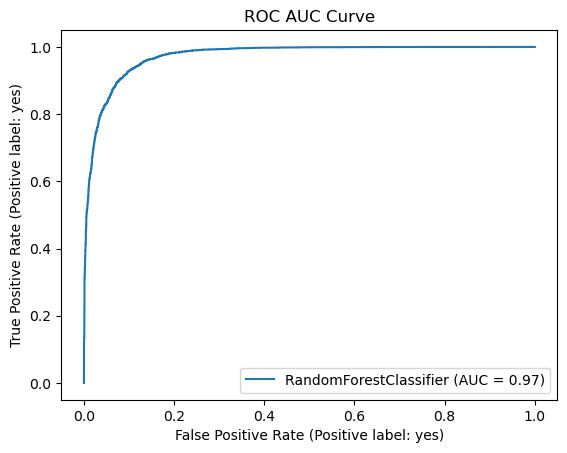

In [36]:
disp = metrics.plot_roc_curve(Final_model, x_test, y_test)
plt.title("ROC AUC Curve")
plt.show()

ROC Curve generated for final model and it shows the AUC score for final model is of 97%.

#### Saving the model

In [37]:
import joblib
joblib.dump(Final_model,"bank_marketing_analysis.pkl")

['bank_marketing_analysis.pkl']

Finally saved the best classification model for bank Marketing Project analysis and our model is ready for use.

Now we need to import our test data and check its accuracy score.

#### Loading test dataset

In [38]:
df_test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
df_test.head(5)  #first 5 rows

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [39]:
#Dropping the unnessary columns as before.
df_test.drop(['ID','previous','pdays','balance'],axis=1,inplace=True)
df_test.head()

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,poutcome
0,32,services,married,secondary,no,yes,no,cellular,15,may,20,6,unknown
1,78,retired,divorced,primary,no,no,no,telephone,1,jul,372,1,unknown
2,31,self-employed,single,tertiary,no,yes,no,unknown,16,may,676,1,unknown
3,57,services,single,primary,no,yes,no,telephone,13,may,65,2,unknown
4,45,blue-collar,divorced,secondary,no,no,yes,unknown,3,jul,111,1,unknown


In [40]:
#encoding data
le=LabelEncoder()
for i in df_test:
    df_test[i]=le.fit_transform(df_test[i])
df_test

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,poutcome
0,14,7,1,1,0,1,0,0,14,8,19,5,3
1,60,5,0,0,0,0,0,1,0,5,371,0,3
2,13,6,2,2,0,1,0,2,15,8,673,0,3
3,39,7,2,0,0,1,0,1,12,8,64,1,3
4,27,1,0,1,0,0,1,2,2,5,110,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,21,4,1,2,0,0,0,0,27,1,147,3,3
13560,36,1,1,0,0,1,0,2,19,6,157,0,3
13561,17,5,1,0,0,1,0,0,28,4,135,0,3
13562,11,0,2,1,0,0,0,0,8,9,207,1,2


In [41]:
#Standardize our data
sc = StandardScaler()
test = sc.fit_transform(df_test)

In [42]:
#loading model
load_model=joblib.load("bank_marketing_analysis.pkl")

In [43]:
load_model

RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=11,
                       n_estimators=30)

In [44]:
pre_test=load_model.predict(test)

In [45]:
df=pd.DataFrame({
    'ans':pre_test
})
df

,ans
0,no
1,yes
2,no
3,no
4,no
...,...
13559,no
13560,no
13561,no
13562,yes


In [47]:
result = pd.concat([df_test, df], axis=1)
result.head()

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,poutcome,ans
0,14,7,1,1,0,1,0,0,14,8,19,5,3,no
1,60,5,0,0,0,0,0,1,0,5,371,0,3,yes
2,13,6,2,2,0,1,0,2,15,8,673,0,3,no
3,39,7,2,0,0,1,0,1,12,8,64,1,3,no
4,27,1,0,1,0,0,1,2,2,5,110,0,3,no


Now our model has finally predicted for the dataset.